# Coinopsy Dataset

Coinopsy is a site that curates 'dead' coins. Dead coins are cryptocurrencies that have met certain criteria, from abandonment to lack of nodes and lack of volume. Submissions are made to the list of dead coins by the community, but developers of the coins may contest the 'dead' status pinned on their coins if any error was made.

As of writing (16 March 2022), there are 2,300+ dead coins and 19,000+ 'living' cryptocurrencies as per Coinopsy and Coinmarketcap, respectively. While dead coins increase by the numbers in just a few days, it should be noted that the population of living coins fluctuate everyday, and **not all of the entries in coinmarketcap are checked for the 'dead' criteria.**

## The dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('coinopsy_cleaned.csv')

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Coin Name   2335 non-null   object
 1   Status      2335 non-null   object
 2   Start Year  2335 non-null   int64 
 3   End Year    2335 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 73.1+ KB


In [5]:
data['Age'] = data['End Year'] - data['Start Year']

## Coins by Year

(0.0, 800.0)

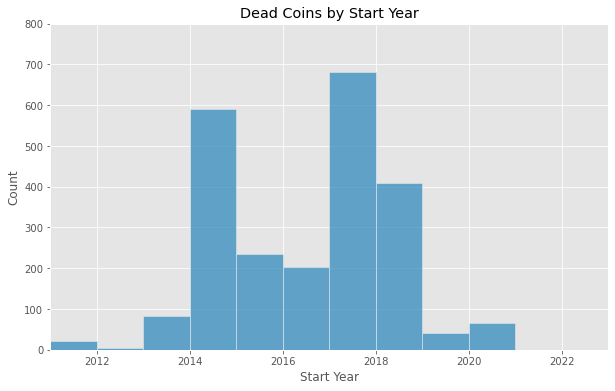

In [6]:
sns.histplot(data=data, x='Start Year', label='Start Year', binwidth=1)
plt.title('Dead Coins by Start Year')
plt.xlim([data['Start Year'].min(), 2023])
plt.ylim([0, 800])

(0.0, 800.0)

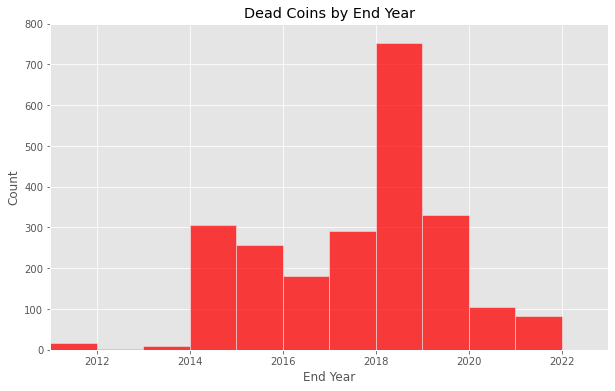

In [7]:
sns.histplot(data=data, x='End Year', label='End Year', color='red', binwidth=1)
plt.title('Dead Coins by End Year')
plt.xlim([data['Start Year'].min(), 2023])
plt.ylim([0, 800])

## Coins by Age

In [8]:
df_age = data.groupby(['Start Year', 'End Year', 'Age']).agg({'Coin Name':pd.Series.count})
df_age.rename(columns={'Coin Name':'Count'}, inplace=True)
df_age.reset_index(inplace=True)

Text(0.5, 1.0, 'Dead Coins by Start and End Year')

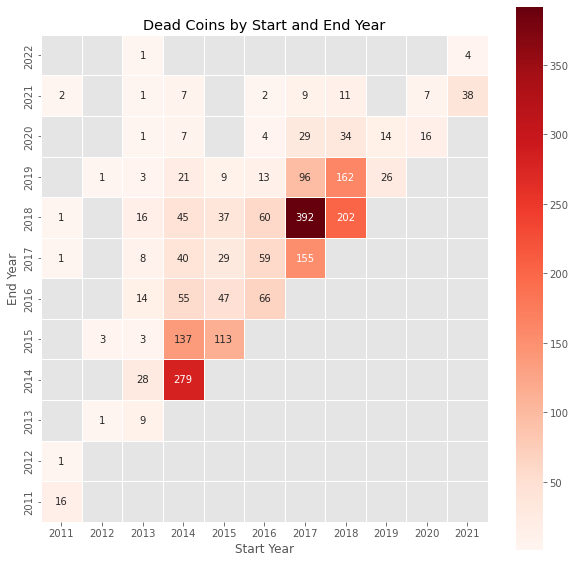

In [9]:
plt.figure(figsize=(10,10))
df_count_pivot = df_age.drop(columns=['Age'])
df_count_pivot = df_count_pivot.set_index('End Year')

df_count_pivot = df_count_pivot.pivot(columns='Start Year', values='Count')
df_count_pivot = df_count_pivot.iloc[::-1]

sns.heatmap(df_count_pivot, square=True, linewidth=0.5,cmap='Reds', annot=True, fmt='.3g')
plt.title('Dead Coins by Start and End Year')

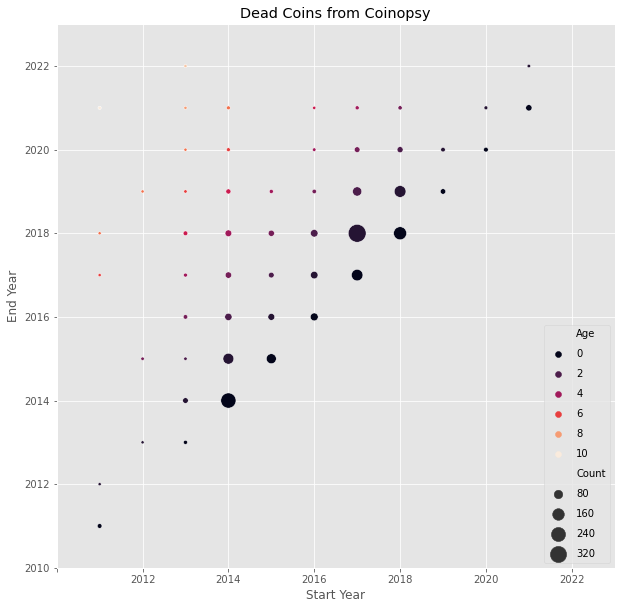

In [10]:
plt.figure(figsize=(10,10))
scatter = sns.scatterplot(data=df_age, x='Start Year', y='End Year', hue='Age', size='Count', 
                sizes=(10, 320), palette='rocket', linewidth=0.5)
scatter.legend()
plt.title('Dead Coins from Coinopsy')
plt.xlim([2010, 2023])
plt.ylim([2010, 2023])

# hide axis start ticks
ax = plt.gca()
xticks = ax.xaxis.get_major_ticks() 
xticks[0].label1.set_visible(False)

# fix legend
ax.legend(loc=4,
          labelspacing=1
         )

(0.0, 10.0)

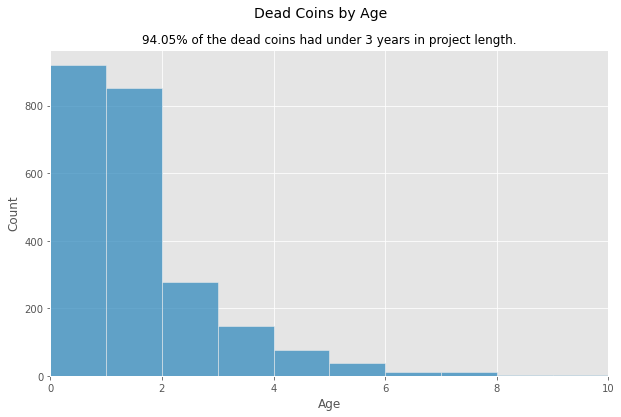

In [11]:
total_coins = data.shape[0]
suptitle = f'{data[data["Age"] <= 3]["Coin Name"].count() / total_coins * 100:.2f}% of the dead coins had under 3 years in project length.'

sns.histplot(data=data, x='Age', label='Age', binwidth=1)
plt.title(suptitle, fontsize=12)
plt.suptitle('Dead Coins by Age', fontsize=14)
plt.xlim([0, data['Age'].max()])

## Dead coins by status

(0.0, 10.0)

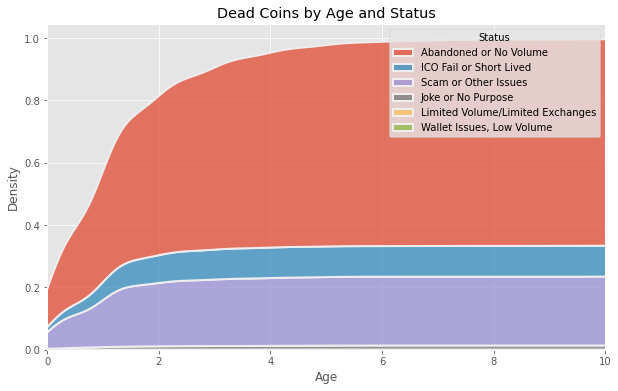

In [12]:
sns.kdeplot(data=data, x='Age', label='Age', cumulative=True, linewidth=2, hue='Status', multiple='stack', warn_singular=False)
kde = plt.title('Dead Coins by Age and Status')
plt.xlim([0, data['Age'].max()])

In [13]:
# aggregate by Status
df_status = data.groupby(['Start Year', 'Status']).nunique()

df_status = df_status.drop(columns=['End Year', 'Age'])
df_status = df_status.rename(columns={'Coin Name': 'No of Coins'})
df_status.reset_index(inplace=True)

df_status.head()

,Start Year,Status,No of Coins
0,2011,Abandoned or No Volume,12
1,2011,ICO Fail or Short Lived,1
2,2011,Joke or No Purpose,2
3,2011,Scam or Other Issues,6
4,2012,Abandoned or No Volume,4


Text(0.5, 1.0, 'Number of Dead Coins by Start Year')

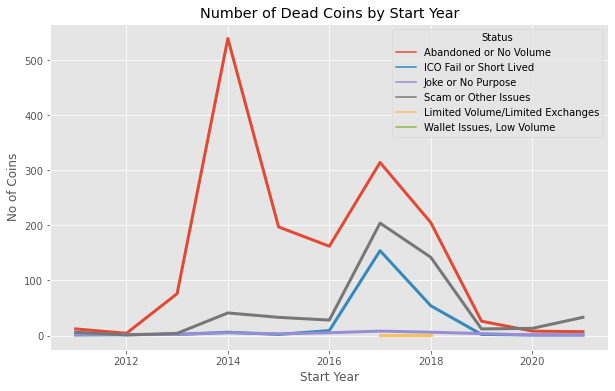

In [14]:
sns.lineplot(data=df_status, x='Start Year', y='No of Coins', hue='Status', linewidth=3)
plt.title('Number of Dead Coins by Start Year')

<b>Takeaways</b>

* Not all coins, including those still listed in coinbase, coinmarketcap and similar websites were even evualuated for the 'dead' criteria. With quick checks using filters on coinmarketcap, there are potential small cap coins that may be evaluated further to be included in the list. <br><br>

* For some reason, even with the bounty for dead coin submissions in Coinopsy, the cryptocurrency community is not very active in reporting dead coins. As such, coins removed from coinmarketcap are not accounted for. <br><br>

* The actual list of dead coins is therefore bigger than what is listed in Coinopsy but may be improved by further scraping / analyses of coins listed in coinmarketcap. Without the full picture from the dead coins still in hiding or were forever forgotted due to lack of documentation, is it useless to further use the data for classification or prediction of coins' success or failure.